In [22]:
#Importing the needed packages
import scipy as sp
from scipy import stats
from scipy import integrate   # not included in basic scipy

import matplotlib.pyplot as plt
# ML finds plots too big, thus the customizations:
plt.rcParams['figure.figsize'] = (6,4.5) # Change default size of plots
plt.rcParams['font.size'] = 14           # Change default fontsize for figures
plt.rcParams['figure.autolayout'] = True # Adjusts for changes

# puts figures in the  notebook.
%matplotlib notebook   

In [52]:
#Defining initial conditions and parameters
E_tot = 10 #Will become random energy generated from boltzmann dist
k = 0.5
m = 2
phi = sp.stats.uniform.rvs(size=1)*2*sp.pi #choose a random phase
#Creates initial conditions given phase and parameters
x0 = (2*E_tot/k)**(1/2) * sp.cos(phi)
v0 = (2*E_tot/m)**(1/2) * sp.sin(phi)
u0 = sp.array([sp.asscalar(x0),sp.asscalar(v0)])
print((2*E_tot/k)**(1/2), (2*E_tot/m)**(1/2))
print(u0)

6.324555320336759 3.1622776601683795
[-5.10599168  1.86606866]


In [59]:
#Defining equation for SHM in system of equations
#Note switched so that these are not dimensionless variables
def shm(u,t):
    x = u[0]
    v = u[1]
    return (v,-(k/m)*x)

In [60]:
#Defining the time interval I want this to take place over
#Getting the integration into an array
t = sp.linspace(0,20,201)  # NOTE: The  points selected for plotting are 
                           # not the points used for the numerical 
                           # evalution.
x, v = sp.integrate.odeint(shm,u0,t).T

<IPython.core.display.Javascript object>


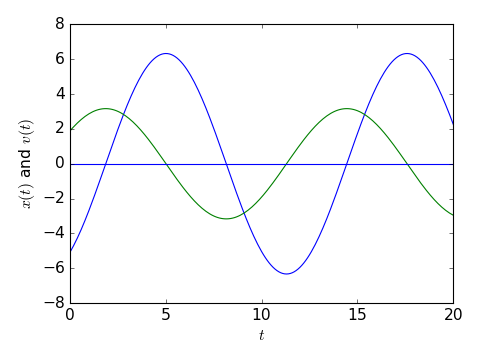

In [61]:
#Plot velocity and position vs time
plt.figure(1)
plt.plot(t,x);
plt.plot(t,v);
plt.axhline(0)
plt.xlabel("$t$")
plt.ylabel("$x(t)$ and $v(t)$")

In [62]:
#Check to make sure equal to u0
print([sp.amax(x),sp.amax(v)])

[6.3244257962425046, 3.162106961533155]


In [63]:
#Calculating energy at each time step
for i in range (0,201):
    Energy = 1/2*m*v[i]**2 + 1/2*k*x[i]**2
    print(Energy)

10.0
10.0000000817
10.0000001041
10.000000041
10.0000000413
10.0000000432
10.0000000186
9.99999997705
9.99999994936
9.99999992147
9.99999990246
9.99999988249
9.99999985686
9.99999976767
9.99999969514
9.99999976286
9.99999981192
9.99999984391
9.9999998636
9.99999986756
9.9999998683
9.99999986424
9.99999986252
9.99999986052
9.99999985937
9.9999998565
9.99999985611
9.99999985631
9.99999985497
9.99999985382
9.99999985335
9.99999985284
9.99999985168
9.99999985115
9.99999985048
9.99999984946
9.99999984898
9.999999848
9.99999984315
9.99999982616
9.9999998169
9.99999982969
9.99999985586
9.99999986317
9.99999989094
9.99999993201
9.9999999435
9.99999997239
9.99999999561
10.0000000044
10.0000000189
10.0000000265
10.000000038
10.0000000556
10.000000061
10.0000000736
10.0000000879
10.0000000935
10.0000001085
10.0000001182
10.000000116
10.0000001151
10.0000001202
10.0000001222
10.0000001202
10.0000001193
10.0000001171
10.0000001161
10.0000001135
10.0000001126
10.0000001101
10.0000001091
10.000000106